In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
sns.set_theme(style="darkgrid")

from sklearn.linear_model import LinearRegression

### Goals:
#### Work in progress 
    
      - Average distance per month (all modalities).
      - Average moving time;
      - Group by type.
      - Historical series by year.
      - Average of average averages
      - Average of the maximum changes.
      - Average elevations (high and low).
      - Time Series

In [29]:
files = ['./data/response1.json', './data/response2.json', './data/response3.json', './data/response4.json', './data/response5.json', './data/response6.json']

In [56]:
dataframes = [pd.read_json(f) for f in files]

In [58]:
df = pd.concat(dataframes)

In [60]:
df.head()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,pr_count,total_photo_count,has_kudoed
0,2,"{'id': 31401271, 'resource_state': 1}",Passeio para o norte.,69263.4,8983,9205,221.0,Ride,10.0,5306688462,...,True,122.2,178.0,False,True,31.0,-14.0,13,1,False
1,2,"{'id': 31401271, 'resource_state': 1}",Afternoon Run,6249.2,2160,2164,48.0,Run,NaN,5297612077,...,True,163.6,180.0,False,True,329.0,-69.0,0,0,False
2,2,"{'id': 31401271, 'resource_state': 1}",Morning Ride,31979.3,4390,4438,84.0,Ride,NaN,5294909081,...,True,142.5,180.0,False,True,30.0,1.0,0,0,False
3,2,"{'id': 31401271, 'resource_state': 1}",Afternoon Run,3814.5,1206,1337,47.0,Run,NaN,5289199665,...,True,160.3,180.0,False,True,-11.0,-41.0,0,0,False
4,2,"{'id': 31401271, 'resource_state': 1}",Morning Run,7421.4,2382,2382,80.0,Run,0.0,5256094139,...,False,NaN,NaN,False,False,33.0,1.0,4,0,False


In [62]:
df.shape

(167, 53)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 16
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   resource_state                 167 non-null    int64  
 1   athlete                        167 non-null    object 
 2   name                           167 non-null    object 
 3   distance                       167 non-null    float64
 4   moving_time                    167 non-null    int64  
 5   elapsed_time                   167 non-null    int64  
 6   total_elevation_gain           167 non-null    float64
 7   type                           167 non-null    object 
 8   workout_type                   143 non-null    float64
 9   id                             167 non-null    int64  
 10  external_id                    167 non-null    object 
 11  upload_id                      167 non-null    int64  
 12  start_date                     167 non-null    obje

In [64]:
#interessing columns

In [167]:
columns=['distance', 'moving_time','elapsed_time', 'type', 'start_date', 'average_speed', 'max_speed']

In [168]:
base = df.copy()

In [169]:
base = base[columns]

In [170]:
# transform column datetime -> date

In [171]:
def transform_data(date1):
    datee=''
    date_t = parser.parse(date1)
    datee = date_t.date()
    return str(datee)

In [172]:
base['start_date'] = base['start_date'].apply(lambda x: transform_data(x))

In [173]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 16
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       167 non-null    float64
 1   moving_time    167 non-null    int64  
 2   elapsed_time   167 non-null    int64  
 3   type           167 non-null    object 
 4   start_date     167 non-null    object 
 5   average_speed  167 non-null    float64
 6   max_speed      167 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 10.4+ KB


In [174]:
# generating date in the index

In [175]:
base.index= pd.to_datetime(base['start_date'])
base=base.drop('start_date', 1)

In [176]:
base['day'] = base.index.day
base['month'] = base.index.month
base['year'] = base.index.year
base['day_of_week'] = base.index.day_of_week

In [177]:
month_desc={
    1: 'january',
    2: 'february',
    3: 'march',
    4: 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8: 'august',
    9: 'september',
    10: 'octuber',
    11: 'november',
    12: 'december'
}

week={
   - 0: 'monday',
   - 1: 'tuesday',
   - 2: 'wednesday',
   - 3: 'thursday',
   - 4: 'friday',
   - 5: 'saturday',
   - 6: 'sunday'
}

In [178]:
base['month'] = base['month'].replace(month_desc)

In [179]:
base.head()

,distance,moving_time,elapsed_time,type,average_speed,max_speed,day,month,year,day_of_week
start_date,,,,,,,,,,
2021-05-16,69263.4,8983,9205,Ride,7.710,14.8,16,may,2021,6
2021-05-14,6249.2,2160,2164,Run,2.893,6.9,14,may,2021,4
2021-05-14,31979.3,4390,4438,Ride,7.285,12.4,14,may,2021,4
2021-05-12,3814.5,1206,1337,Run,3.163,4.1,12,may,2021,2
2021-05-07,7421.4,2382,2382,Run,3.116,9.7,7,may,2021,4


In [128]:
## analysis


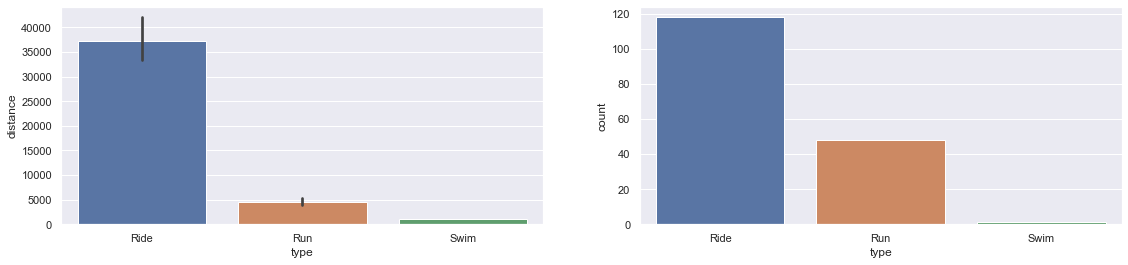

In [129]:
#distance X type and count X type
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(19,4))
sns.barplot(x='type', y='distance', data=base, ax=axis1)
sns.countplot(x='type', data=base, ax=axis2);

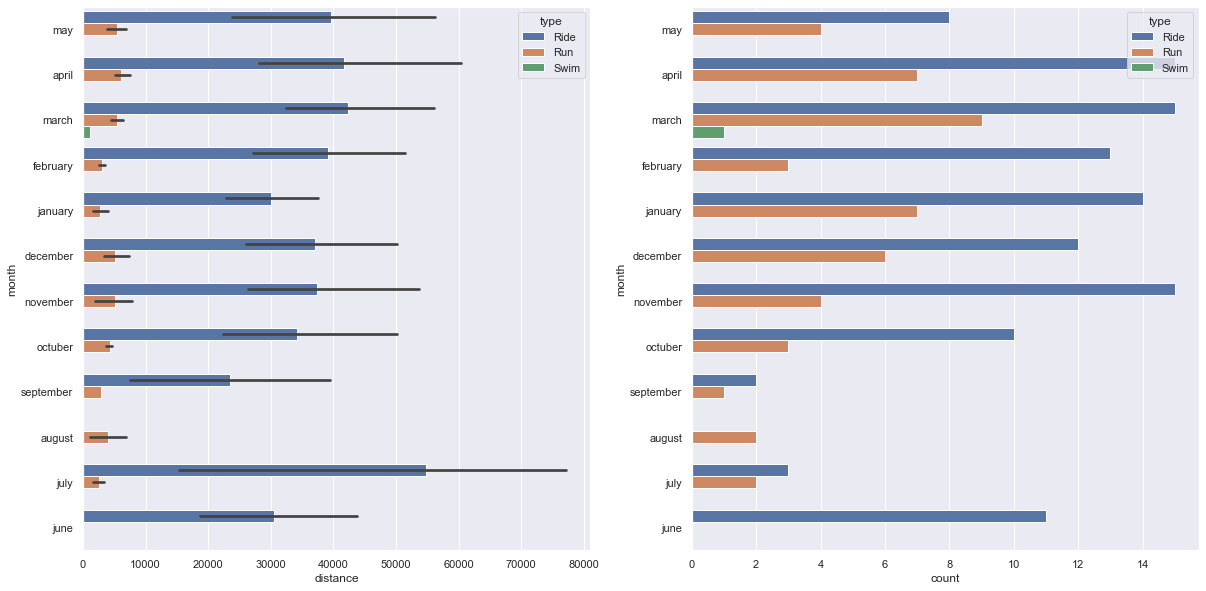

In [137]:
# distance x count -> month
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='distance', y='month', data=base, ax=axis1, hue='type', orient='h')
sns.countplot(y='month', data=base, ax=axis2, hue='type', orient='h');

In [138]:
# distance x count -> year

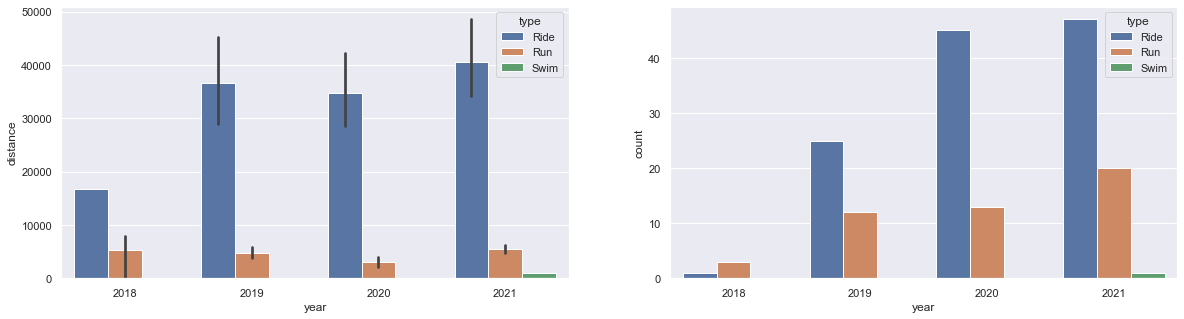

In [140]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x='year', y='distance', data=base, ax=axis1, hue='type')
sns.countplot(x='year', data=base, ax=axis2, hue='type');

In [145]:
## distance x moving time

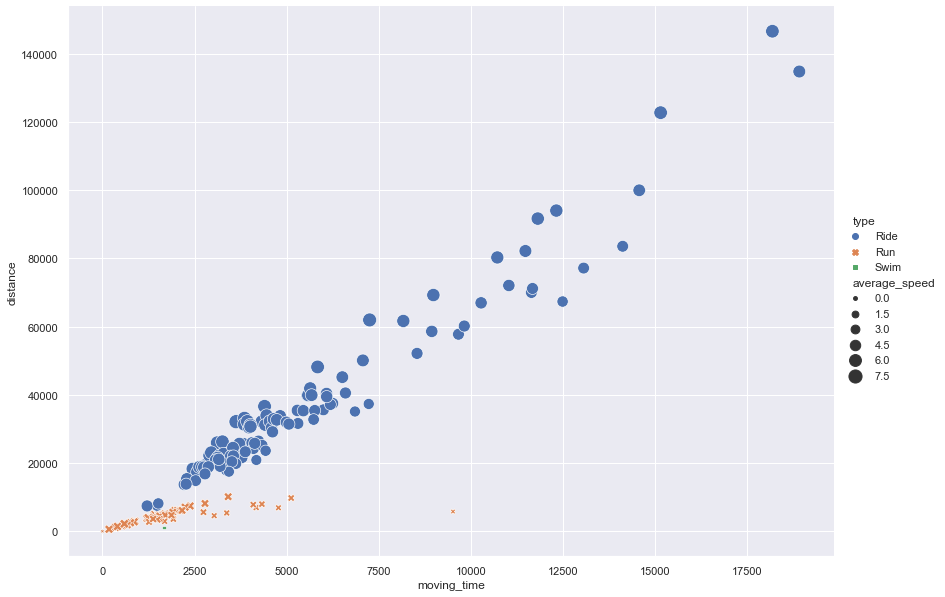

In [143]:
sns.relplot(x='moving_time', y='distance', hue="type", style='type', data=base, height=8.27, aspect=11.7/8.27, size='average_speed', sizes=(15, 200));


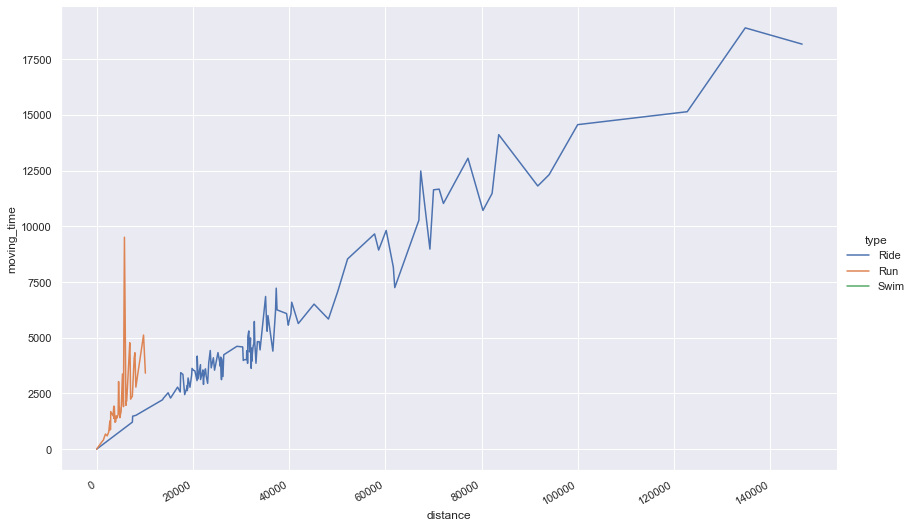

In [144]:
g = sns.relplot(x="distance", y="moving_time", kind="line",hue='type', height=8.27, aspect=11.7/8.27, data=base)
g.fig.autofmt_xdate()

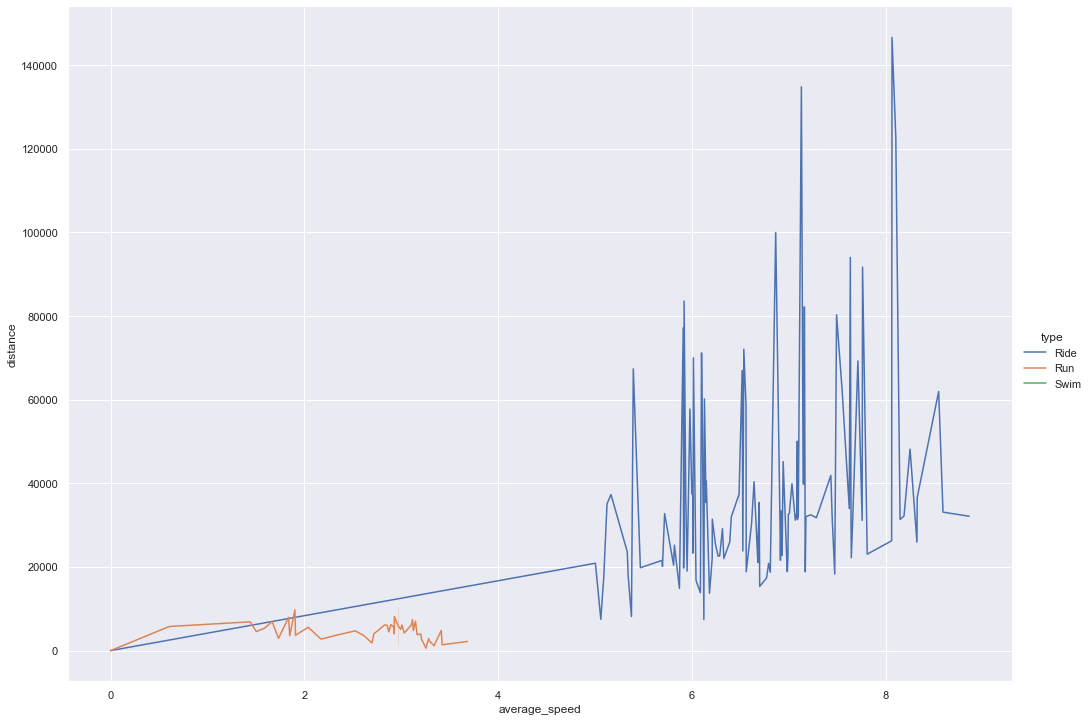

In [189]:
sns.relplot(x="average_speed", y="distance", kind="line", hue='type',height=10, aspect=11.7/8.27, data=base);
g.fig.autofmt_xdate() 

In [27]:
###

In [190]:
# 1 run
# 2 ride

In [214]:
ride= base.loc[base['type']=='Ride']
run = base.loc[base['type']=='Run']

In [241]:
#avg speed per year

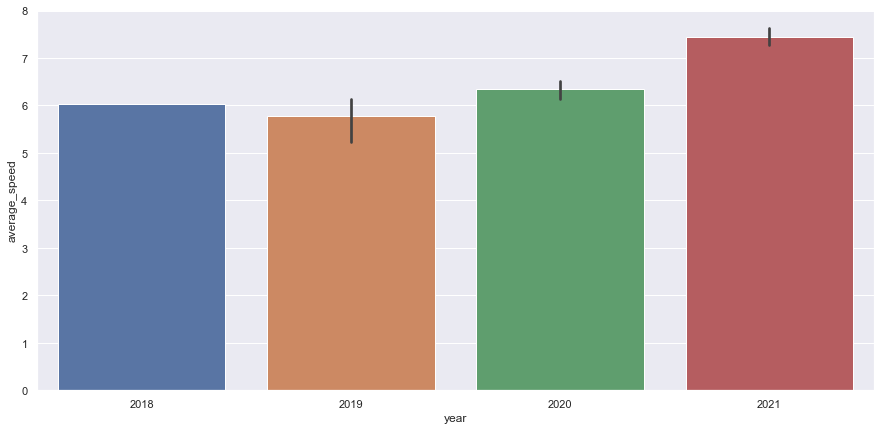

In [240]:
fig, (axis1) = plt.subplots(1, figsize=(15,7))
ax = sns.barplot(x="year", y="average_speed", data=ride, estimator=np.mean, orient='v')


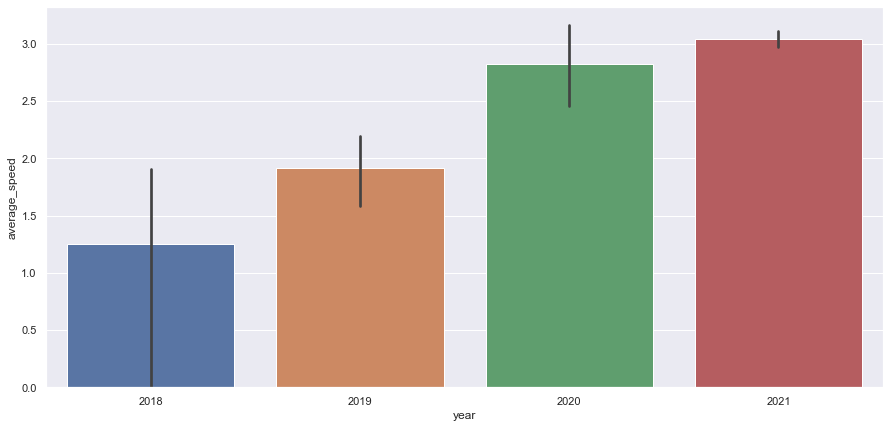

In [244]:
fig, (axis1) = plt.subplots(1, figsize=(15,7))
ax = sns.barplot(x="year", y="average_speed", data=run, estimator=np.mean, orient='v')


In [242]:
    #ride distance per month 2021 

In [ ]:
    #run distance per month 2021 

In [243]:
    # ride avg speed per month 2021

In [ ]:
    # run avg speed per month 2021